In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install hopsworks --quiet

In [3]:
import hopsworks
import pandas as pd

In [4]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/199829
Connected. Call `.close()` to terminate connection gracefully.


In [68]:
import os
print(os.getcwd()) #Thats stupid jupyter lol
wine_df = pd.read_csv("wine/wine.csv")
wine_df

/home/jovyan


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [69]:
ucount = pd.DataFrame(wine_df['quality'].value_counts()).sort_values(by=["quality"])
ucount

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


#### Initial thoughts
There are very few missing numbers in each column => I will simply remove rows with missing entries

Only one categorical, color => Will map white to 1 and red to 2

In [11]:
wine_df = wine_df.dropna()

wine_df['type'].replace(['white', 'red'],[1, 2], inplace=True)

### Exploratory Data Analysis (EDA)

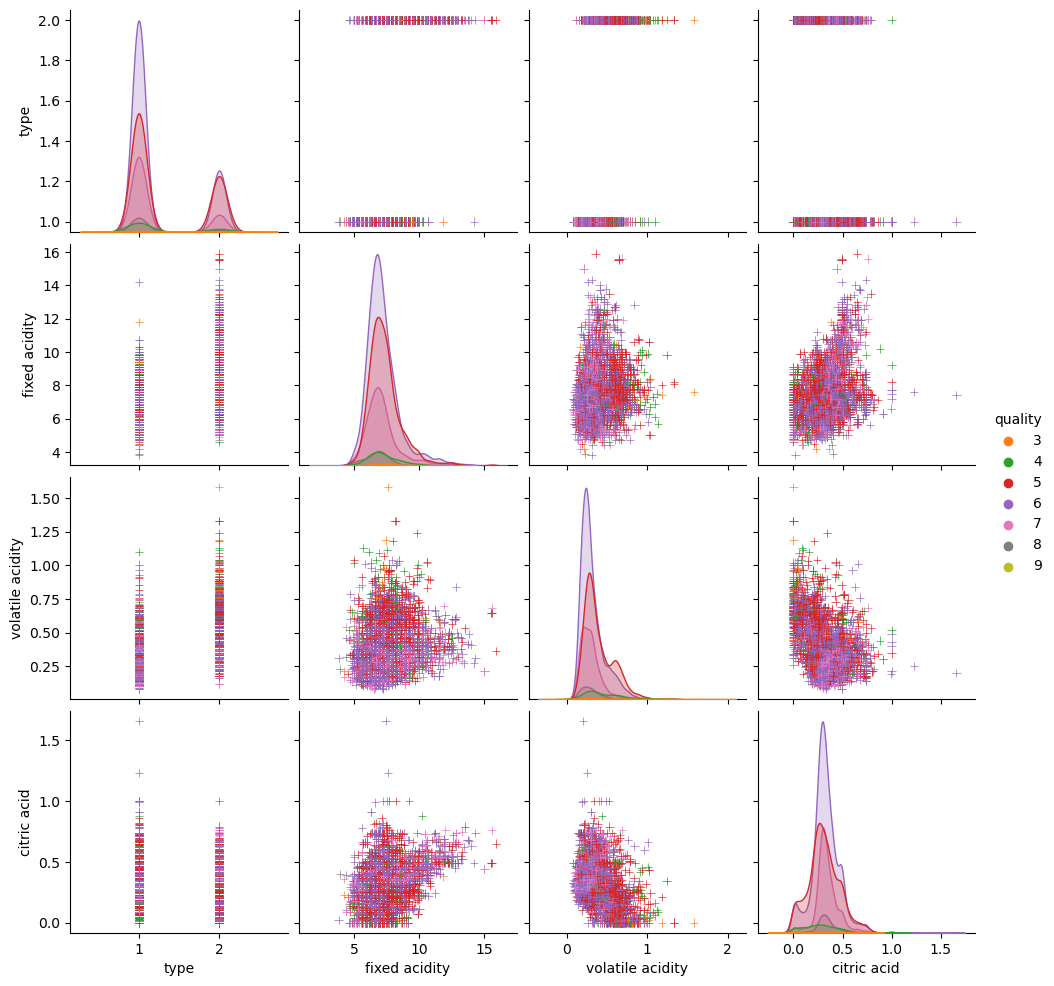

In [19]:
palette = dict(zip([9,8,7,6,5,4,3], sns.color_palette('tab10_r', 7)))
#Plotting correlation between first 4 features
g = sns.pairplot(wine_df[["type","fixed acidity","volatile acidity","citric acid","quality"]], hue='quality', palette=palette, markers='+')
plt.show()

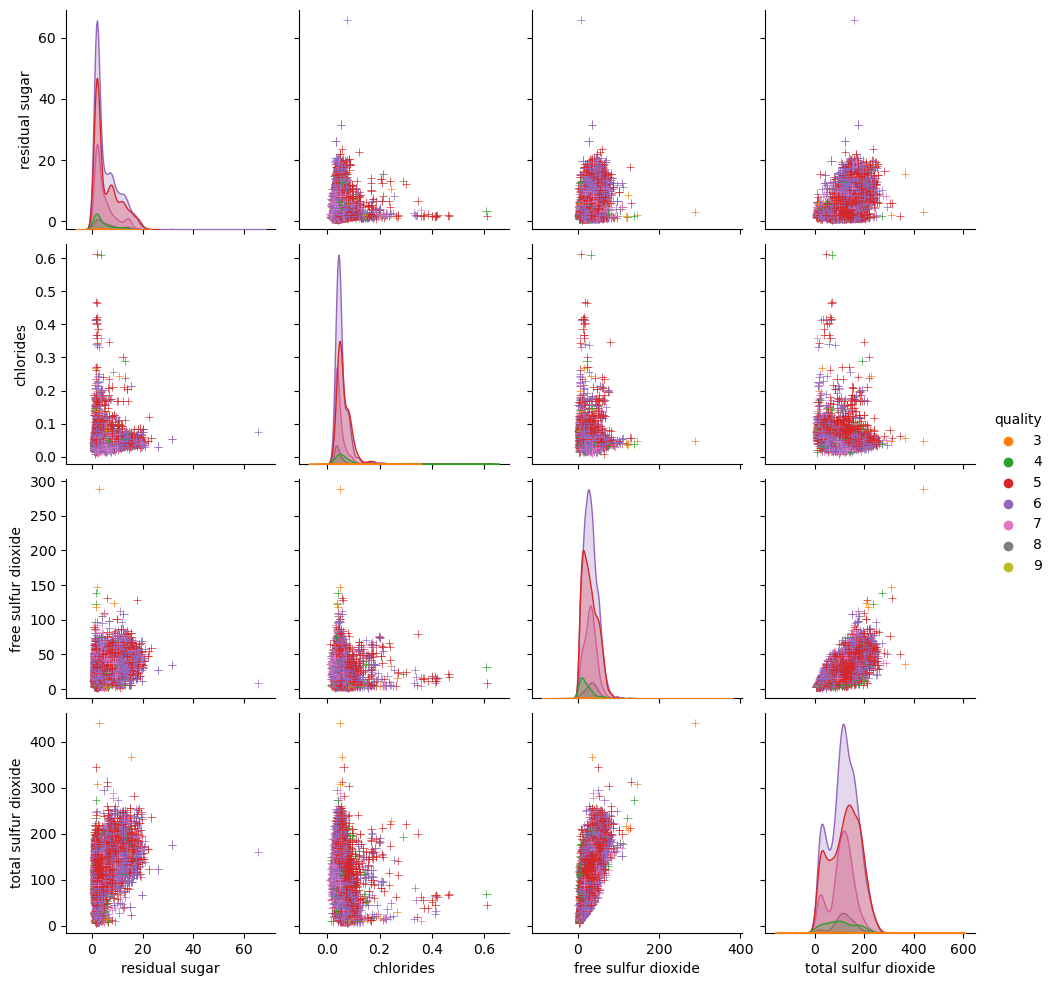

In [20]:
#Plotting correlation between middle 4 features
g = sns.pairplot(wine_df[["residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","quality"]], palette=palette, hue='quality', markers='+')
plt.show()

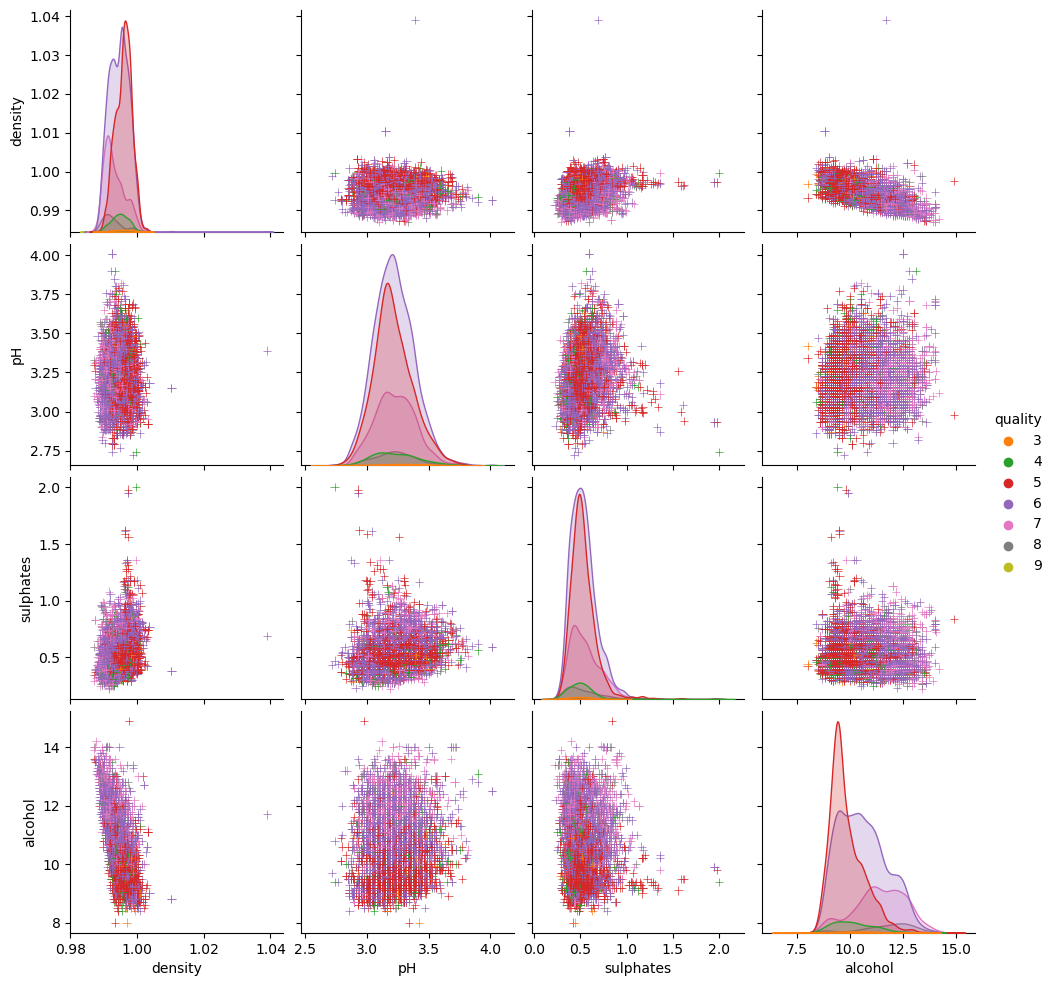

In [21]:
#Plotting correlation between last 4 features
g = sns.pairplot(wine_df[["density","pH","sulphates","alcohol","quality"]], palette=palette, hue='quality', markers='+')
plt.show()

### Visualize range of values 


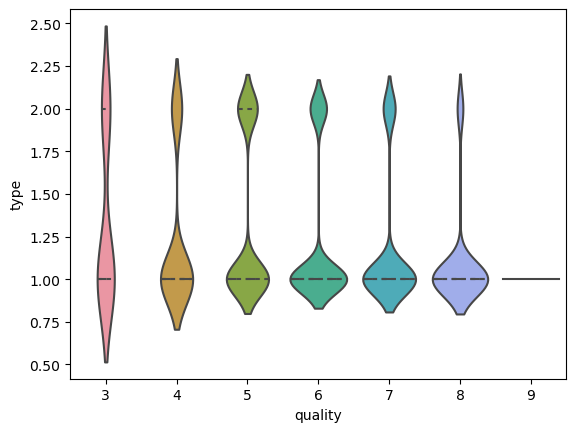

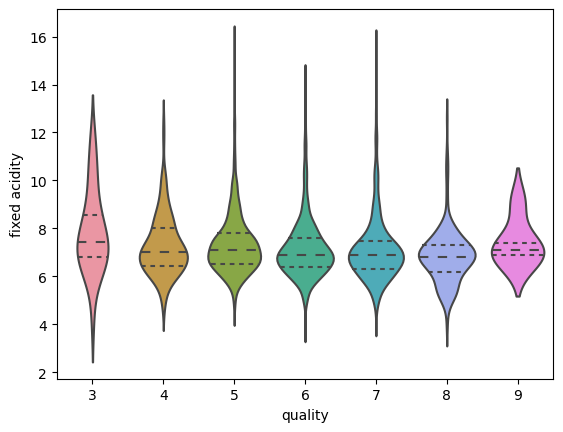

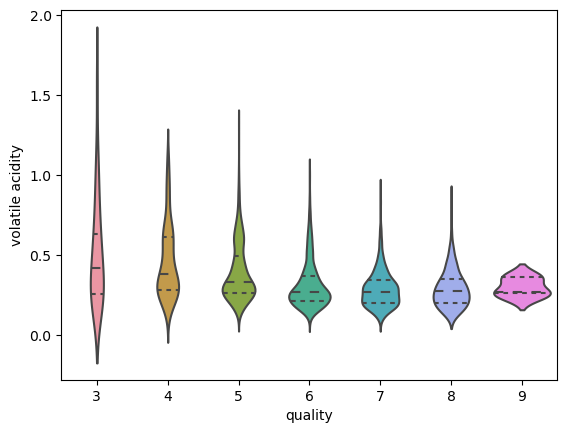

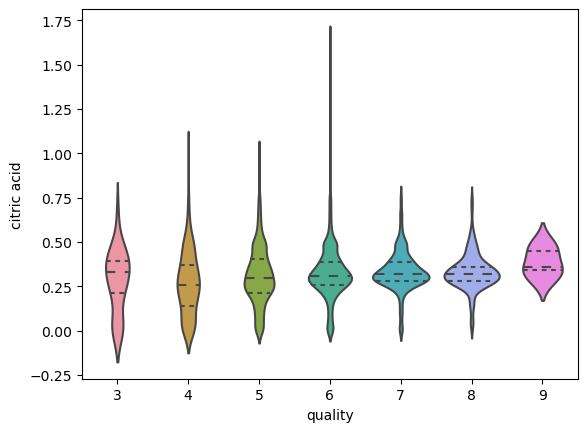

In [23]:
#First four features
g = sns.violinplot(x="quality", y="type", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="fixed acidity", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="volatile acidity", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="citric acid", data=wine_df, inner='quartile')
plt.show()

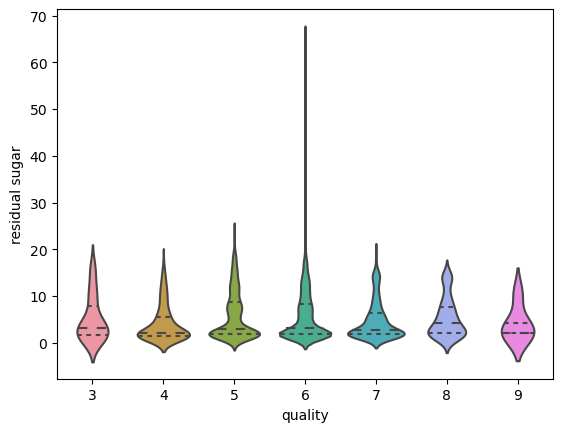

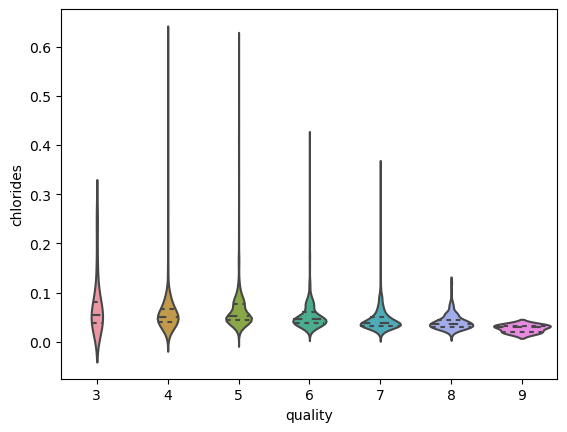

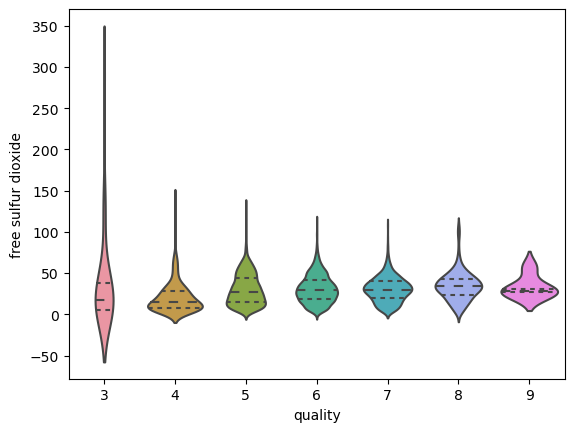

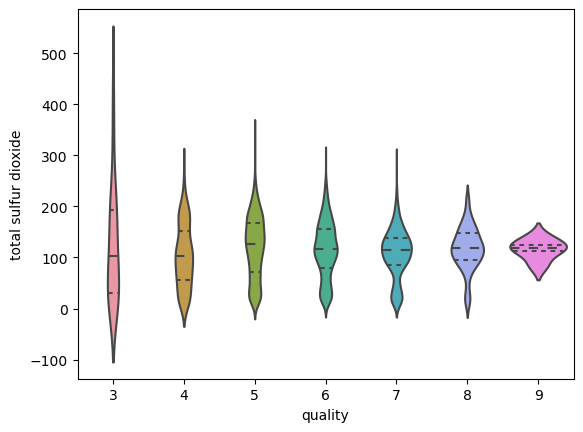

In [24]:
#Middle four features
g = sns.violinplot(x="quality", y="residual sugar", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="chlorides", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="free sulfur dioxide", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="total sulfur dioxide", data=wine_df, inner='quartile')
plt.show()

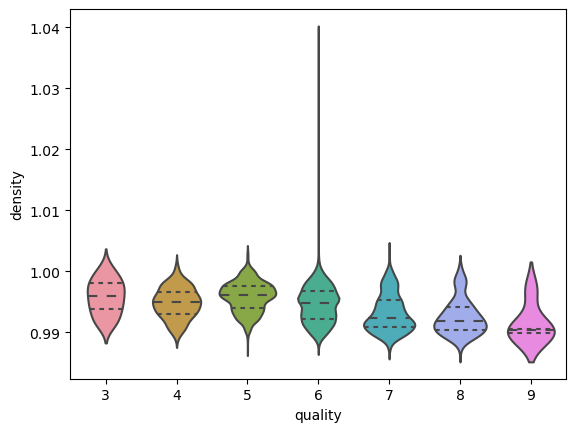

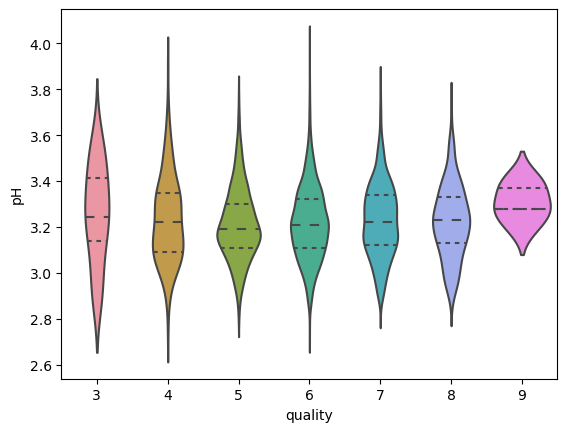

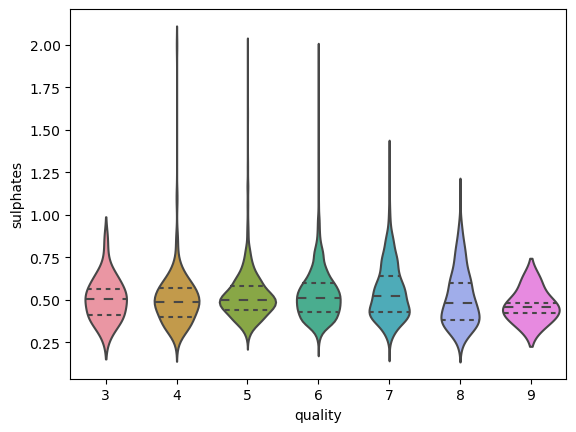

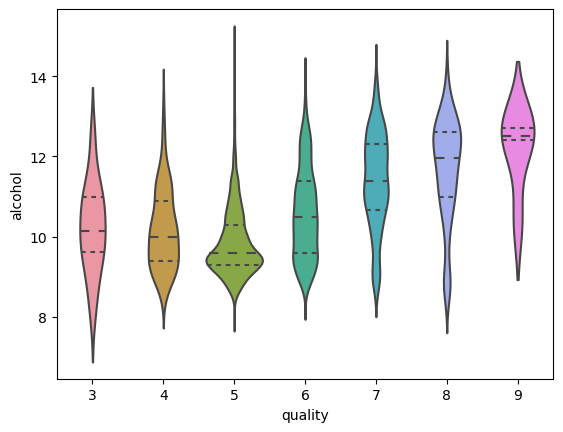

In [56]:
#Last four features
g = sns.violinplot(x="quality", y="density", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="pH", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="sulphates", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="alcohol", data=wine_df, inner='quartile')
plt.show()

### Comments
Most features are very similar across the board with minor differences in mean and std for different quality. It is hard to arge that any of these have no predictive power since there are some differences but it is also hard to argue that they have a lot since most differences are smal. Since there is not any clear features to base the algorithm on I will include most of them. That said alcohol is a fairly dicriminatory feature which should be given more weight (density is also better than average) and I will drop fixed acidity since its distribution is very even.

### Insert our Wine DataFrame into a FeatureGroup

In [65]:
#Transform the dataframe back into including red and white as the type to keep it in its original format
wine_df['type'].replace([1, 2],['white', 'red'], inplace=True)

#Rename features to allow insertion on hopsworks
wine_df = wine_df.rename(columns={"pH": "ph", "fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                                 "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide"})

In [67]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["quality","type","fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","ph","sulphates","alcohol"], 
    description="Wine dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/199829/fs/199748/fg/234831


Uploading Dataframe: 0.00% |          | Rows 0/6463 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/199829/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f891b6687c0>, None)